In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
import pandas as pd


     |████████████████████████████████| 972kB 6.7MB/s 
     |████████████████████████████████| 6.5MB 11.8MB/s 
     |████████████████████████████████| 14.8MB 327kB/s 
     |████████████████████████████████| 225kB 8.0MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp36-none-any.whl size=37264 sha256=cad93a31558106056e60c0152310de83c90812a3de3e517b3e1a53b84cd48beb
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [2]:
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
from pandas.tseries.offsets import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoSeries
from pyproj import CRS
import fiona 
from sklearn.cluster import KMeans ,MiniBatchKMeans
import seaborn as sns; sns.set()
import csv
pd.options.display.max_rows = 10
np.set_printoptions(precision=4, suppress=True)

In [5]:
data = gpd.read_file('/content/drive/My Drive/Colab Notebooks/countries.shp')


,geometry
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [18]:
ny = gpd.read_file('geo_export_fa767ac4-2c7d-4869-9133-8db4bfc30320.shp')

crs= CRS("epsg:4326")
ny

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187245e+09,464650.051822,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934091e+09,729592.941749,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4.0,Queens,3.044042e+09,900087.667215,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
4,5.0,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [10]:
file = "Electric_Vehicle_Charging_Stations_in_New_York.csv"
url = "https://data.ny.gov/resource/7rrd-248n.json"
df = pd.read_json(url)

df1= df[['latitude','longitude']]
display(df1)

,latitude,longitude
0,42.469059,-76.486687
1,43.222098,-75.421363
2,42.132595,-73.882650
3,42.825420,-78.595024
4,42.608073,-73.849243
...,...,...
995,42.158820,-76.856120
996,40.855696,-73.197832
997,43.154875,-75.965306
998,40.760421,-73.964418


In [20]:
st = gpd.GeoDataFrame(df1, crs=crs,  geometry=[Point(xy) for xy in zip(df1["longitude"], df1["latitude"])])
st


,latitude,longitude,geometry
0,42.469059,-76.486687,POINT (-76.48669 42.46906)
1,43.222098,-75.421363,POINT (-75.42136 43.22210)
2,42.132595,-73.882650,POINT (-73.88265 42.13260)
3,42.825420,-78.595024,POINT (-78.59502 42.82542)
4,42.608073,-73.849243,POINT (-73.84924 42.60807)
...,...,...,...
995,42.158820,-76.856120,POINT (-76.85612 42.15882)
996,40.855696,-73.197832,POINT (-73.19783 40.85570)
997,43.154875,-75.965306,POINT (-75.96531 43.15487)
998,40.760421,-73.964418,POINT (-73.96442 40.76042)


In [17]:
#df['coordinates'] = [Point(long, lat) for long, lat in zip(-df['longitude'], df['latitude'])]
#df['coordinates']

0              POINT (76.486687 42.469059)
1              POINT (75.421363 43.222098)
2               POINT (73.88265 42.132595)
3               POINT (78.595024 42.82542)
4            POINT (73.8492426 42.6080728)
                      ...                 
995     POINT (76.85611999999999 42.15882)
996          POINT (73.1978321 40.8556963)
997    POINT (75.96530600000001 43.154875)
998    POINT (73.96441800000001 40.760421)
999          POINT (73.8346327 40.8468211)
Name: coordinates, Length: 1000, dtype: object

(40.68, 40.825)

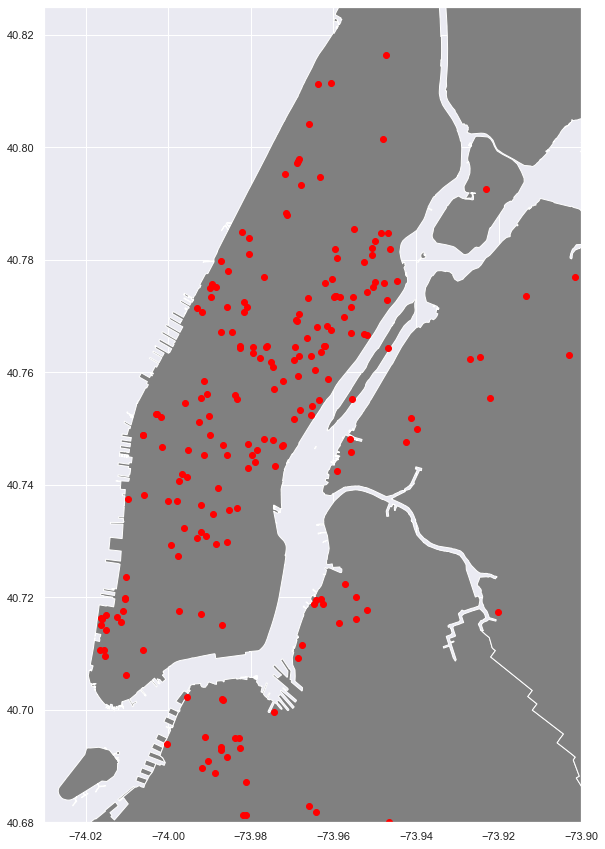

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
ny.plot(ax=ax, color='grey') # countries are in WGS84
st.plot(ax=ax, color='red') 

plt.xlim(-74.03,-73.9)
plt.ylim(40.68,40.825)
